# ULTIMATE Pandas notes
##some nots of bai yun

##basics
- assign columns
df[['column name']]
- slicing columns
[:, 'col':'col']
- changing column names
df.rename(columns={'original name': 'modified name'}, inplace=True)
- adding columns
df.columns = [name]
- selecting columns
name = df['column name']

- reading csv
name = pd.read_csv('filename', index_col='specify')

- to create a dataframe
name = df.[df.column == 'specify']

- filtering data
df.all() <- does not include 0s
df.any() <- includes 0s
df.isnull().any() <- any col that has a NaN value
df.notnull().all() <- only values
dr.dropna(how='any') <- drops empty cols

- extracting rows
- to extract rows from a column that is x or y
df.col.isin(['x', 'y'])

- counting based on df
df.value_counts()

##loc and iloc
- When you want rows and columns
    - loc and iloc f(x)
    - loc is label-based
    - iloc is position-based
    
df.loc['name'] will print rows from a series
df.loc[['name']] will print a dataframe

- to get specific columns or rows
[['row first'],['column second']]
df.loc[['name', 'name'],['name', 'name']]
df.loc[:, ['name', 'name']] will print out all rows and select columns

- individual rows
df.loc[('col name', 'second name')]

df.loc['col name'] prints all rows - you can slice also

- fancy indexing
df.loc[(['col name', 'col name'], 'second separate col name', :] - or ..., 'spec col']
- inner index also works
df.loc[(col name', [second separate col name', 'sscn2']), :]
- slicing all indexes
df.loc[(slice(None), slice('name', 'name')), :]

##merging data
- to merge
pd.merge - if columns ton't match
use pd.merge(name, name, on ['col', 'col'])
- to specify columns to merge
pd.merge(file, file2, left_on='col', right_on'col')
- additional notes
how='left' 
- all rows in the left df is the base merged column
how='outer' 
- all rows are saved
.join 
- joins the columns
merge_ordered(file, file2) - outer join is default

##unstacking and sorting the data
df.unstack(level='specify')
- will unstack multi-index frames so we can pivot
df.stack will create a multi-level index
- to swap
.swaplevel(0,1) 
- will swap index
.sort_index() 
- will sort the swapped index
.sort_values()
- will sort after swapped index
- specify by
.sort_values('col', ascending=True or False)

##to restore a pivoted dataframe, use melt function
pd.melt(df, id_vars=['specify']

##groupby
df.groupby('value').count()
- splits the group by 'value'
- applies a count() function on the groups
- combines counts per group
- works with mean() std() sum() etc.
('value').[['column', 'column2']].stat()
- multilevelgroupby
df.groupby(['value', 'value2']).stat()

##pivot table
df.pivot_table
- add several levels if necessary
aggfunc='specify' e.g., 'count'
index='indexname'
values='valname'
columns='colname'

##aggregation
- aggregations include
.groupby.mean(), std(), count()
.agg(['max', 'sum']) 
- multilevelindex for max and sum
data_range 
- calculate the range of data

- applying a transformation
name = df.groupby('row')['col'].transform(stat)
def specifyname(group):
    df = pd.DataFrame(
        {'col': input(group['col']),
        'col2': group['col'],
        'col3': group['col']})
    return df
df.apply(specifyname)

##DataFrame methods
- to return the maximum value located
df.idxmax()
- for columns
(axis='columns') to specifu the data you are looking for is in a column
- to return the minimum value located
df.idxmin()
- to order categorical data
df.Column = pd.Categorical(values=df.Column, categories=['specify', 'specify2'], ordered=True)

##other rando stuff
- Forward-fill will automatically enter null entries with previous data.
-  Fill_method='ffill' in merging
.ffill() at the end of the code
- array of the categorical data
.unique()
- prints categorical data
astyle('cateogry')
- dropx dupes in the data
.drop_duplicates()
- to create a boolean series
(df.boolean array = 'x') & (another if necessary)
- for find out how many x in distinct y
.nunique()
- to create a DataFrame
name = df.loc[name1 & name2]
- to create a new series base don the dataframe
df2 = name.groupby('col')
series = df2['col if necessary'].nunique(if you need unique elements from each group).sort_values (if necessary)

##plotting
- first, create the DataFrame
- next, group by to tell Pandas what your want to group the data by
name = df.groupby(['col', 'col'])
- if you want to aggregate, add 
['aggregate column'].count() #or sum, etc.
- reshape the data by unstacking and specify the level you want for the graph
name = name.unstack(level='col or index')
name.plot()
plt.show()


#using data to explore pandas

In [5]:
#import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import the csv file
#this is the csv file of relative clauses
rc = pd.read_csv("RelativeClauses_NHL.csv")

rc.head()

,L1,Subject,Region,Word,Time,Sentence,Case,Order,Reflexive,Predicate,Binding
0,Japanese,1,1,???,464,49,R,23,Simple S1,Simple,False
1,Japanese,1,2,???,389,49,R,23,Simple S1,Simple,False
2,Japanese,1,3,??????,409,49,R,23,Simple S1,Simple,False
3,Japanese,1,4,???,378,49,R,23,Simple S1,Simple,False
4,Japanese,1,5,?,650,49,R,23,Simple S1,Simple,False


### This is a csv file from a self paced reading task in Japanese.
- The sentences are comparing between simple clauses and relative clauses.
- The L1s are L1 Japanese and L1 Chinese and L1 Korean learners of L2 Japanese.
- All subjects are marked by numeral 1-n
- The regions indicate the phrase number.
    When we originally imported the file from LINGER to Excel, something got messed up and all the MS Mincho Japanese font did not carry over (we tried UTF-8 when convering to csv but it still didn't work). But that's not as important.
- We are going to examine differences between subject, object, and oblique relatives.
- Thus, the colums of interest are:
    - L1, Region, Time, and Predicate
- The rows of interest are only 
    - Region 2, 3, 4
- This is where some of the weird things may happen for L2 learners.

#Next
- print out and see some of the info of the columns of interest.

In [6]:
rc_df = rc[['L1', 'Region', 'Time', 'Predicate']]
rc_df.head()

,L1,Region,Time,Predicate
0,Japanese,1,464,Simple
1,Japanese,2,389,Simple
2,Japanese,3,409,Simple
3,Japanese,4,378,Simple
4,Japanese,5,650,Simple


### Lets try to find out some differences
- first, change some of the column names so that we know what we are looking for, and also check some of the data info
- create visualization for oblique relative clauses
- example of oblique
    - Ichiro-wa [Koji-ga tomatta hotel]-o yoyakusita.
    - Ichiro reserved [the hotel in which Koji stayed].
 - in Japanese, it has been argued that subject, object, and oblique relatives are all processed similarly by L1 speakers, and relative clauses are processed as adjectival clauses (unlike English). let's examine if L2 learners of Japanese (L1 Chinese and L1 Korean) if they are able to show L1-like processing abilities
 - to do this, we will examine the average reading times of region 2 (where the second subject appears), region 3 (where the critical region is), and region 4 (the splillover regions is).

In [3]:
# rc_df.rename(columns={'Predicate':'Clause'}, inplace=True)
# rc_df.head()

###start with just looking at oblique relatives
- code below allows you to select certain rows only

In [7]:
rc_select = rc_df.loc[rc_df['Predicate'] == 'Oblique']
rc_select.head()

,L1,Region,Time,Predicate
1302,Japanese,1,454,Oblique
1303,Japanese,2,339,Oblique
1304,Japanese,3,349,Oblique
1305,Japanese,4,369,Oblique
1306,Japanese,5,599,Oblique


In [ ]:
### so now we have all of the data, now we just need to plot...but how...

In [8]:
# groupby L1 and regions to get the RT averages (but still looks the same as above...)
rc_L1 = rc_select.groupby(['L1', 'Region']).mean()
rc_L1

Time
L1       Region             
Chinese  1        704.625000
         2        718.075000
         3       1307.275000
         4        613.075000
         5        720.550000
         6        689.650000
         7       2263.925000
Japanese 1        497.904762
         2        515.809524
         3        533.738095
         4        649.690476
         5        448.238095
         6        556.476190
         7       1197.000000
Korean   1        732.500000
         2        829.687500
         3       1211.812500
         4        588.937500
         5        919.000000
         6        395.000000
         7        845.125000

In [9]:
rc_pivot = rc_select.pivot_table('Time', ['L1'], 'Region')
rc_pivot.head()

Region,1,2,3,4,5,6,7
L1,,,,,,,
Chinese,704.625000,718.075000,1307.275000,613.075000,720.550000,689.65000,2263.925
Japanese,497.904762,515.809524,533.738095,649.690476,448.238095,556.47619,1197.000
Korean,732.500000,829.687500,1211.812500,588.937500,919.000000,395.00000,845.125


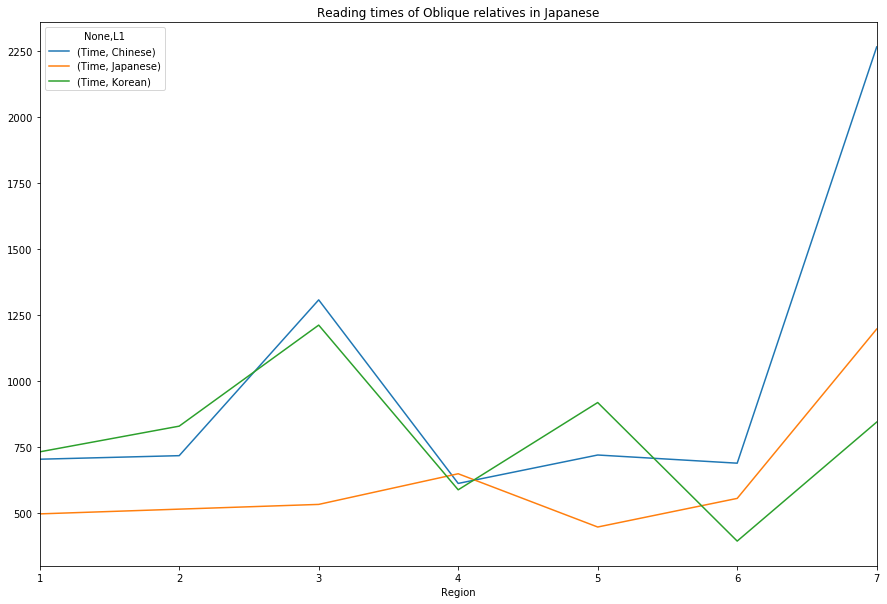

In [13]:
pp = rc_L1.unstack(level = 'L1')
plot = pp.plot(kind='line', title="Reading times of Oblique relatives in Japanese", figsize=(15, 10), legend=True, fontsize=10)
plt.show()